In [377]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [378]:
def euclidean(a, b):
    return minkowski(a, b, p=2)

def manhattan(a, b):
    return np.sum(np.abs(a - b), axis=-1)

def minkowski(a, b, p=3):
    return np.sum(np.abs(a - b) ** p, axis=-1) ** (1 / p)

In [403]:
def KMC(df, k=3, f=euclidean):
    centroids = df.sample(k).to_numpy()
    clusters = np.zeros(df.shape[0], dtype=np.uint8) # clusters[i] := clusters index for df.iloc[i]

    for _ in range(100):
        for i, row in enumerate(df.values):
            distances = f(centroids, row)
            clusters[i] = np.argmin(distances)

        for i in range(k):
            centroids[i] = df[clusters == i].mean().to_numpy()

    SSE = sum(f(point, clusters[i]) for i, point in enumerate(df.values))
    return clusters, centroids, SSE

In [404]:
path = "data/data10.csv"
df = pd.read_csv(path)

In [405]:
KMC(df)

(array([2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1], dtype=uint8),
 array([[30.375     ,  8.375     ,  7.75      ],
        [23.        ,  9.75      ,  4.75      ],
        [16.        ,  5.16666667, 12.33333333]]),
 np.float64(467.02911010458257))

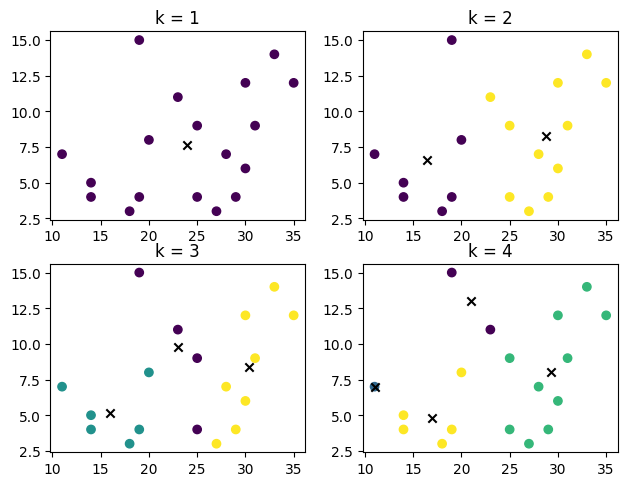

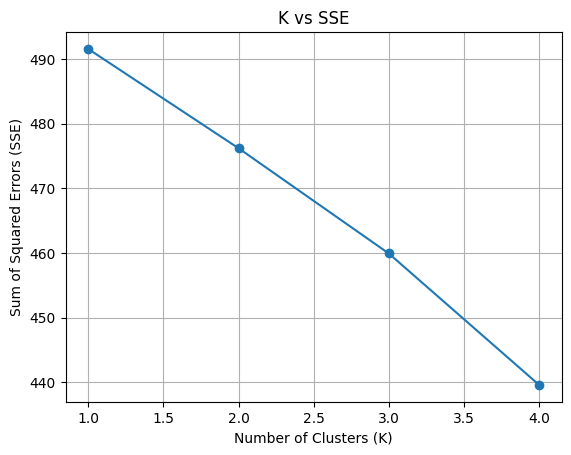

In [429]:
def plot_clusters(data, clusters, centroids, k, ax):
    ax.set_title(f'k = {k}')
    ax.scatter(data.iloc[:, 0], data.iloc[:, 1], c=clusters)
    ax.scatter(centroids[:, 0], centroids[:, 1], color='black', marker='x')

fig, axes = plt.subplots(nrows=2, ncols=2)
fig.tight_layout()

SSE_list = []
for k in range(1, 5):
    clusters, centroids, sse = KMC(df, k)
    SSE_list.append(sse)
    plot_clusters(df, clusters, centroids, k, axes[(k - 1) // 2, (k - 1) % 2])

plt.figure()
plt.plot(range(1, 5), SSE_list, marker='o')
plt.title('K vs SSE')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Sum of Squared Errors (SSE)')
plt.grid()
plt.show()